In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://github.com/ironhack-labs/lab-customer-analysis-round-2/raw/master/files_for_lab/csv_files/marketing_customer_analysis.csv')

#df

In [2]:
df_shape = df.shape
print("DataFrame Shape:", df_shape)

df.columns = df.columns.str.lower().str.replace(' ', '_')

numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\nNumerical Columns:", numerical_cols)
print("\nCategorical Columns:", categorical_cols)

DataFrame Shape: (10910, 26)

Numerical Columns: ['unnamed:_0', 'customer_lifetime_value', 'income', 'monthly_premium_auto', 'months_since_last_claim', 'months_since_policy_inception', 'number_of_open_complaints', 'number_of_policies', 'total_claim_amount']

Categorical Columns: ['customer', 'state', 'response', 'coverage', 'education', 'effective_to_date', 'employmentstatus', 'gender', 'location_code', 'marital_status', 'policy_type', 'policy', 'renew_offer_type', 'sales_channel', 'vehicle_class', 'vehicle_size', 'vehicle_type']


In [3]:
df.drop('unnamed:_0', axis=1, inplace=True)
df.set_index('customer', inplace=True)

#df

In [4]:

nan_values_before_imputation = df.isnull().sum()
print("NaN Values Before Imputation:\n", nan_values_before_imputation)

df.columns = df.columns.str.lower().str.replace(' ', '_')

numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
print("\nNumerical Columns:", numerical_cols)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Columns:", categorical_cols)

for col in df.columns:
    if col in numerical_cols:
        df[col].fillna(df[col].mean(), inplace=True)
    elif col in categorical_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)

nan_values_after_imputation = df.isnull().sum()
print("\nNaN Values After Imputation:\n", nan_values_after_imputation)

NaN Values Before Imputation:
 state                             631
customer_lifetime_value             0
response                          631
coverage                            0
education                           0
effective_to_date                   0
employmentstatus                    0
gender                              0
income                              0
location_code                       0
marital_status                      0
monthly_premium_auto                0
months_since_last_claim           633
months_since_policy_inception       0
number_of_open_complaints         633
number_of_policies                  0
policy_type                         0
policy                              0
renew_offer_type                    0
sales_channel                       0
total_claim_amount                  0
vehicle_class                     622
vehicle_size                      622
vehicle_type                     5482
dtype: int64

Numerical Columns: ['customer_lifetime_valu

In [5]:
#df

In [5]:

df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])

df['month'] = df['effective_to_date'].dt.month

first_quarter_data = df[df['month'].isin([1, 2, 3])]

print("\nData for the First Quarter:")
first_quarter_data


Data for the First Quarter:


C:\Users\wailb\AppData\Local\Temp\ipykernel_10456\353008331.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])


,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,...,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,vehicle_type,month
customer,,,,,,,,,,,,,,,,,,,,,
DK49336,Arizona,4809.216960,No,Basic,College,2011-02-18,Employed,M,48029,Suburban,...,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,A,2
KX64629,California,2228.525238,No,Basic,College,2011-01-18,Unemployed,F,0,Suburban,...,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,A,1
LZ68649,Washington,14947.917300,No,Basic,Bachelor,2011-02-10,Employed,M,22139,Suburban,...,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A,2
XL78013,Oregon,22332.439460,Yes,Extended,College,2011-01-11,Employed,M,49078,Suburban,...,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A,1
QA50777,Oregon,9025.067525,No,Premium,Bachelor,2011-01-17,Medical Leave,F,23675,Suburban,...,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,A,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FE99816,Nevada,15563.369440,No,Premium,Bachelor,2011-01-19,Unemployed,F,0,Suburban,...,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A,1
KX53892,Oregon,5259.444853,No,Basic,College,2011-01-06,Employed,F,61146,Urban,...,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A,1
TL39050,Arizona,23893.304100,No,Extended,Bachelor,2011-02-06,Employed,F,39837,Rural,...,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,A,2


In [6]:
## we put all of this into a function


import pandas as pd

def process_marketing_data(file_url):
    df = pd.read_csv(file_url)

    df.columns = df.columns.str.lower().str.replace(' ', '_')

    df.drop('unnamed:_0', axis=1, inplace=True)

    df.set_index('customer', inplace=True)

    numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
    categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

    for col in df.columns:
        if col in numerical_cols:
            df[col].fillna(df[col].mean(), inplace=True)
        elif col in categorical_cols:
            df[col].fillna(df[col].mode()[0], inplace=True)

    df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])

    df['month'] = df['effective_to_date'].dt.month

    first_quarter_data = df[df['month'].isin([1, 2, 3])]

    return first_quarter_data

file_url = 'https://github.com/ironhack-labs/lab-customer-analysis-round-2/raw/master/files_for_lab/csv_files/marketing_customer_analysis.csv'
df = process_marketing_data(file_url)
#df

C:\Users\wailb\AppData\Local\Temp\ipykernel_10456\1705813706.py:24: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['effective_to_date'] = pd.to_datetime(df['effective_to_date'])


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10910 entries, DK49336 to IV32877
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   state                          10910 non-null  object        
 1   customer_lifetime_value        10910 non-null  float64       
 2   response                       10910 non-null  object        
 3   coverage                       10910 non-null  object        
 4   education                      10910 non-null  object        
 5   effective_to_date              10910 non-null  datetime64[ns]
 6   employmentstatus               10910 non-null  object        
 7   gender                         10910 non-null  object        
 8   income                         10910 non-null  int64         
 9   location_code                  10910 non-null  object        
 10  marital_status                 10910 non-null  object        
 11  monthly_prem

In [8]:
df.describe(exclude=['datetime', 'object'])

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount,month
count,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000,10910.000000
mean,8018.241094,37536.284785,93.196059,15.149071,48.091934,0.384256,2.979193,434.888330,1.466728
std,6885.081434,30359.195670,34.442532,9.783520,27.940675,0.885589,2.399359,292.180556,0.498915
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,1.000000
25%,4014.453113,0.000000,68.000000,7.000000,24.000000,0.000000,1.000000,271.082527,1.000000
50%,5771.147235,33813.500000,83.000000,15.000000,48.000000,0.000000,2.000000,382.564630,1.000000
75%,8992.779137,62250.750000,109.000000,23.000000,71.000000,0.384256,4.000000,547.200000,2.000000
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678,2.000000


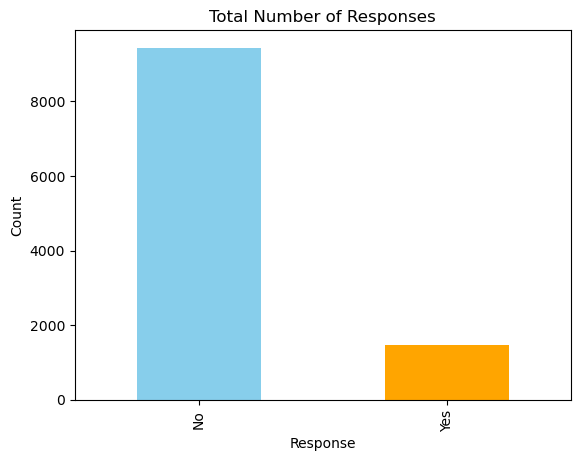

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

response_counts = df['response'].value_counts()
response_counts.plot(kind='bar', color=['skyblue', 'orange'])
plt.title('Total Number of Responses')
plt.xlabel('Response')
plt.ylabel('Count')
plt.show()

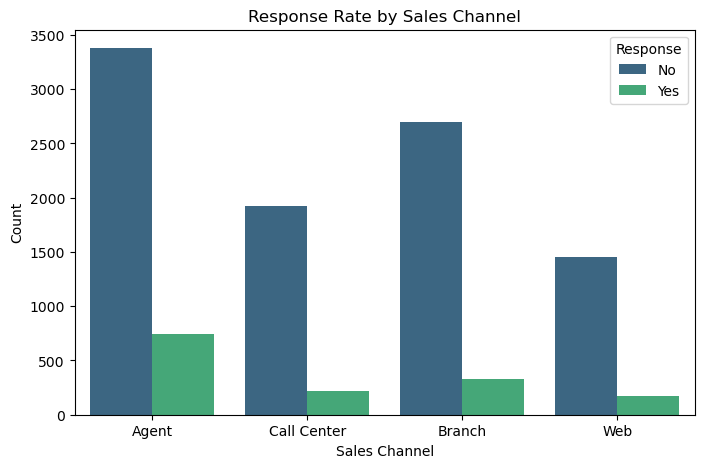

In [10]:
plt.figure(figsize=(8, 5))
sns.countplot(x='sales_channel', hue='response', data=df, palette='viridis')
plt.title('Response Rate by Sales Channel')
plt.xlabel('Sales Channel')
plt.ylabel('Count')
plt.legend(title='Response', loc='upper right', labels=['No', 'Yes'])
plt.show()

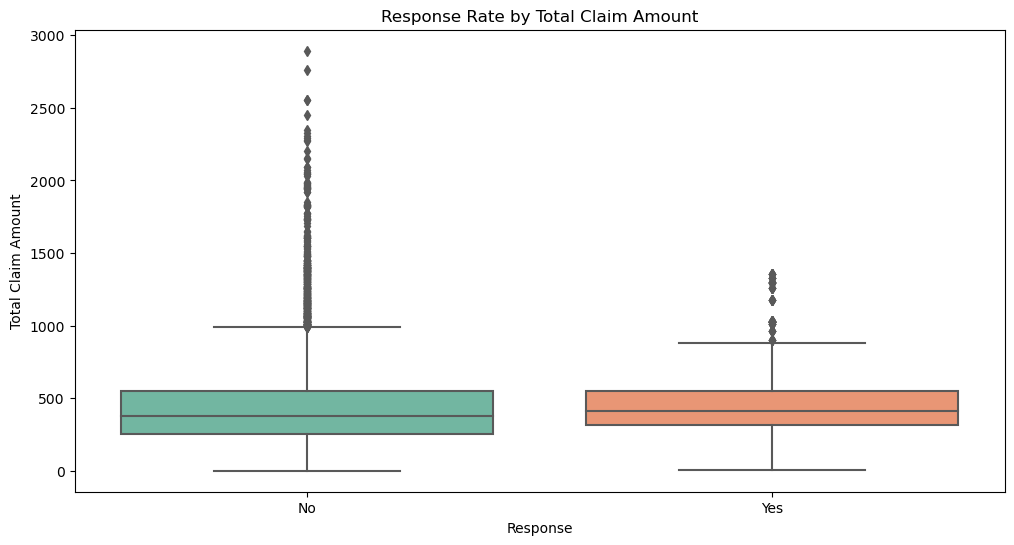

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='response', y='total_claim_amount', data=df, palette='Set2')
plt.title('Response Rate by Total Claim Amount')
plt.xlabel('Response')
plt.ylabel('Total Claim Amount')
plt.show()

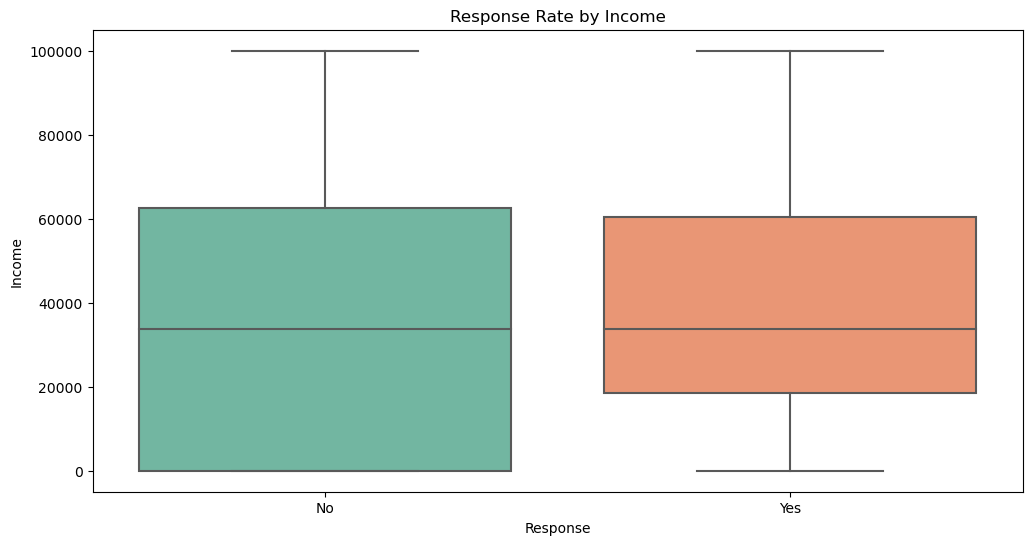

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='response', y='income', data=df, palette='Set2')
plt.title('Response Rate by Income')
plt.xlabel('Response')
plt.ylabel('Income')
plt.show()

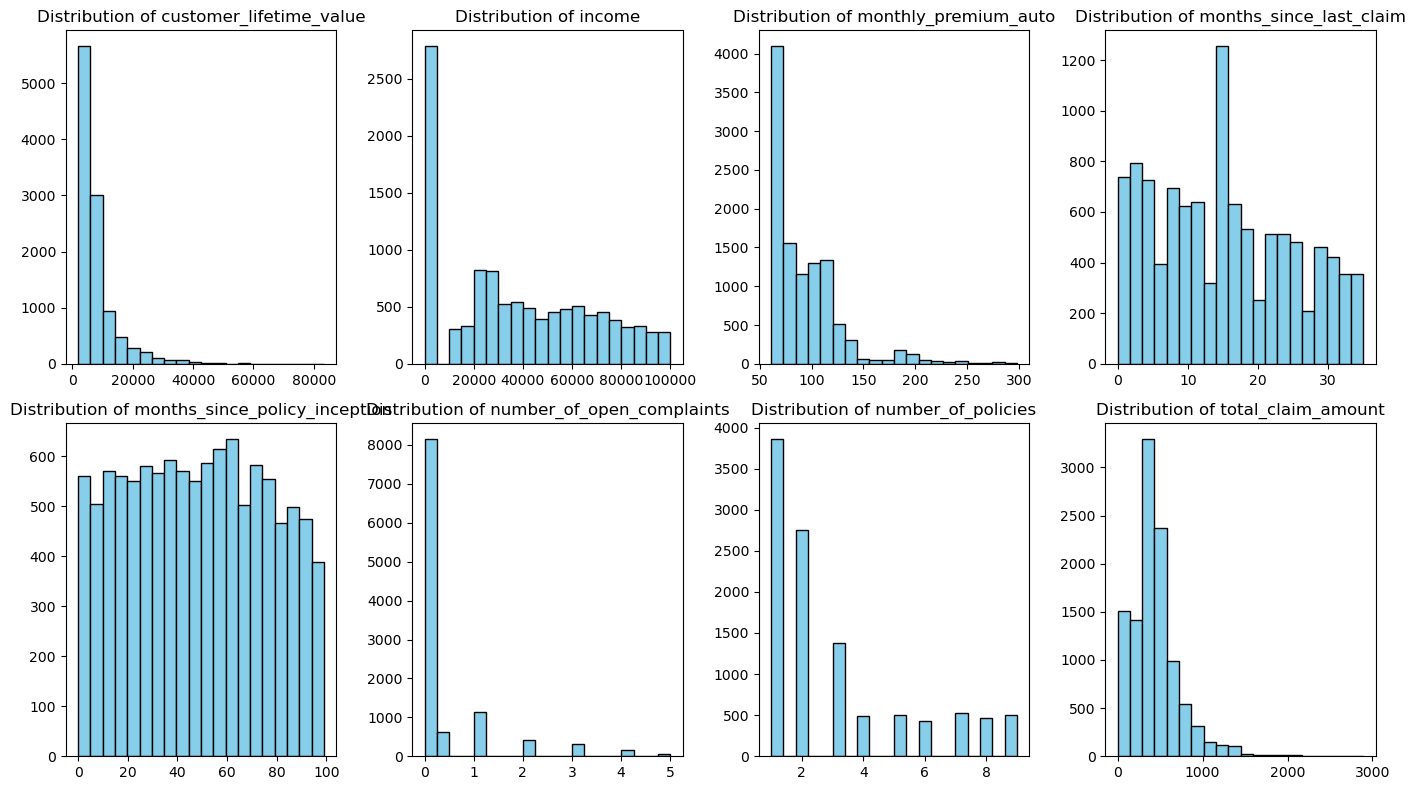

In [13]:
plt.figure(figsize=(14, 8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)  # Adjusted the subplot dimensions to fit the number of numerical columns
    plt.hist(df[col], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

C:\Users\wailb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wailb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wailb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\wailb\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

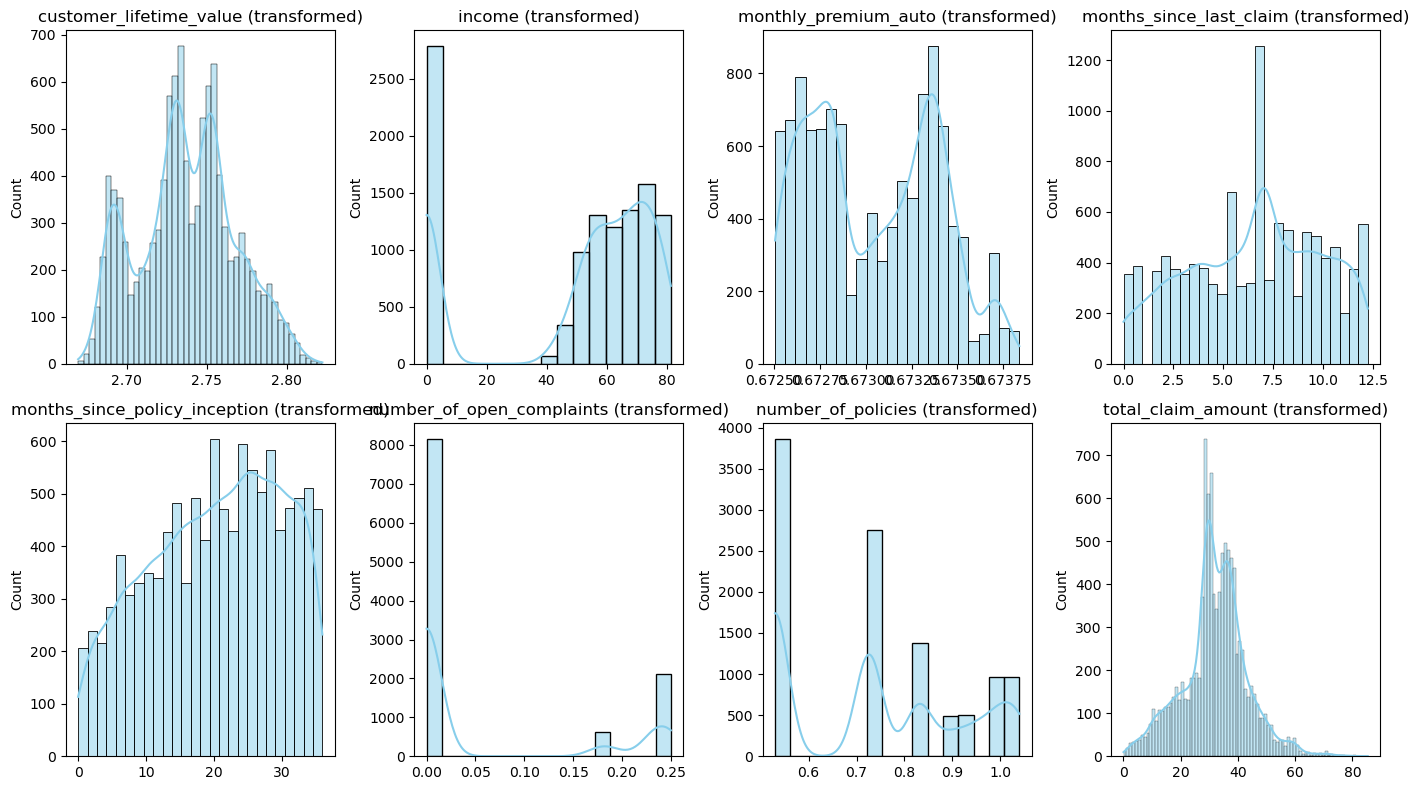

In [14]:
from scipy import stats

plt.figure(figsize=(14, 8))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 4, i)
    transformed_data, _ = stats.boxcox(df[col] + 1)  # Applying Box-Cox transformation
    sns.histplot(transformed_data, kde=True, color='skyblue', edgecolor='black')
    plt.title(f'{col} (transformed)')

plt.tight_layout()
plt.show()

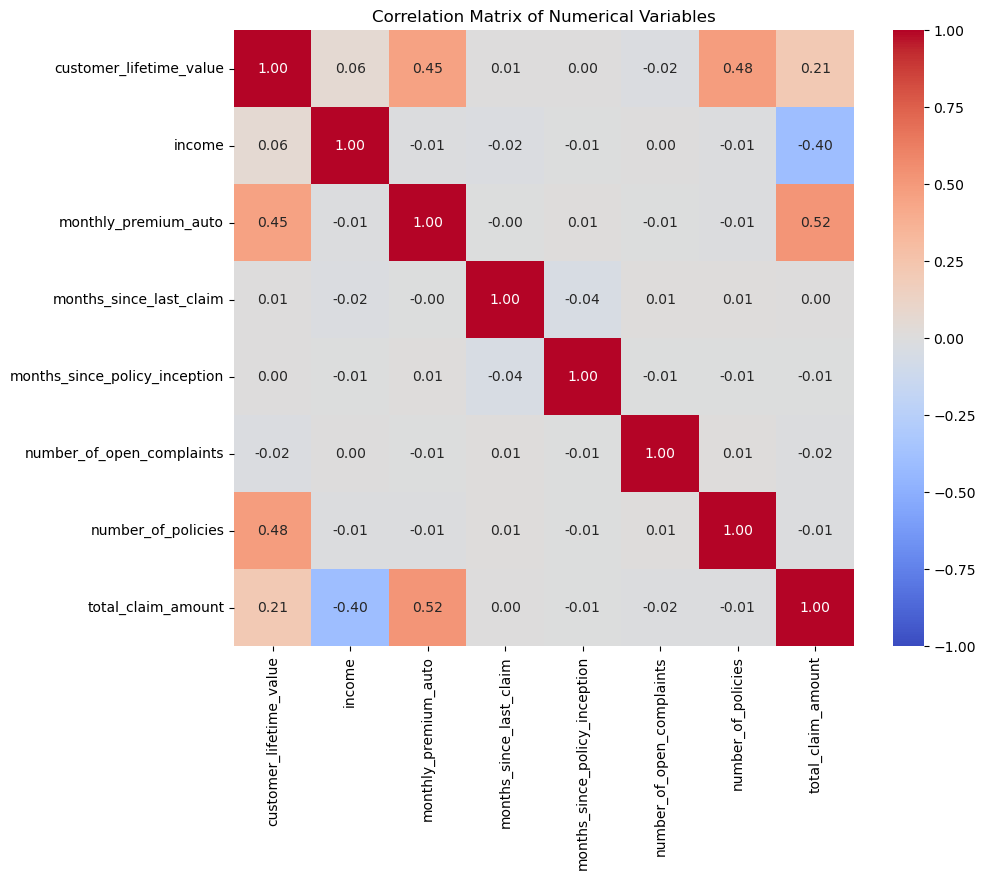

In [15]:
correlation_matrix = df[numerical_cols].corr('spearman')

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

plt.title('Correlation Matrix of Numerical Variables')
plt.show()

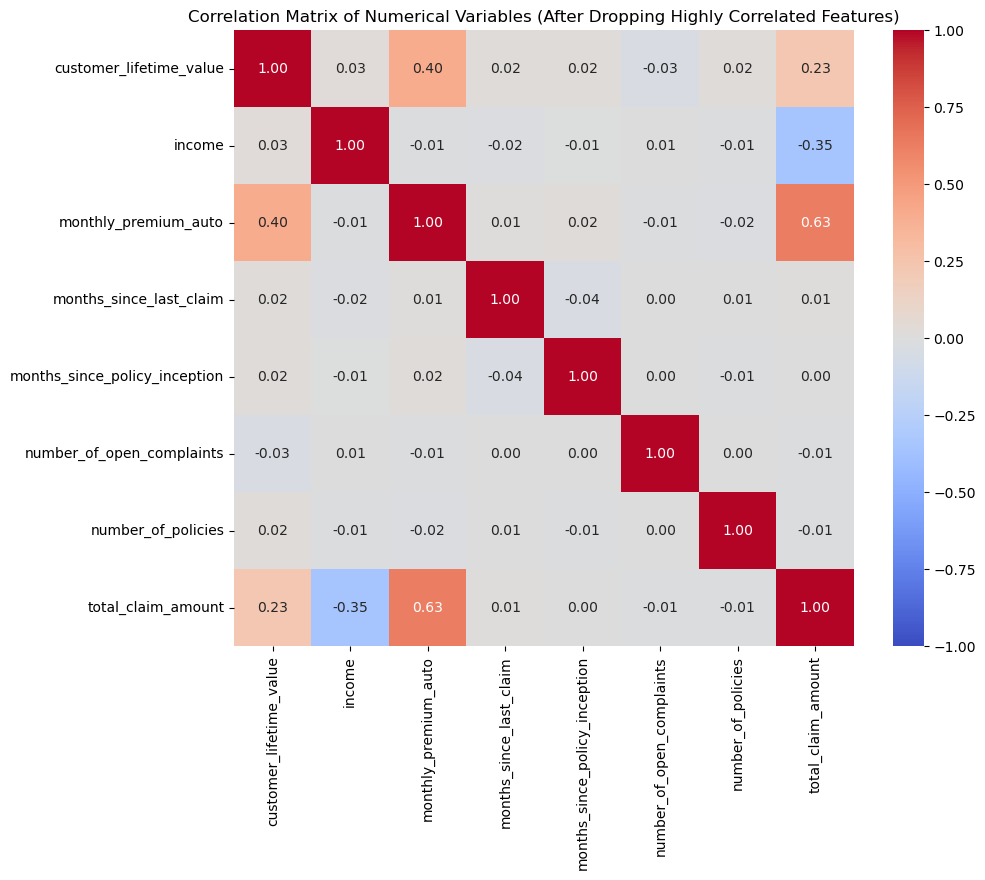

In [16]:
import numpy as np

highly_correlated = set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.9:
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)

df = df.drop(columns=highly_correlated)

correlation_matrix_after_drop = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix_after_drop, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)


plt.title('Correlation Matrix of Numerical Variables (After Dropping Highly Correlated Features)')
plt.show()

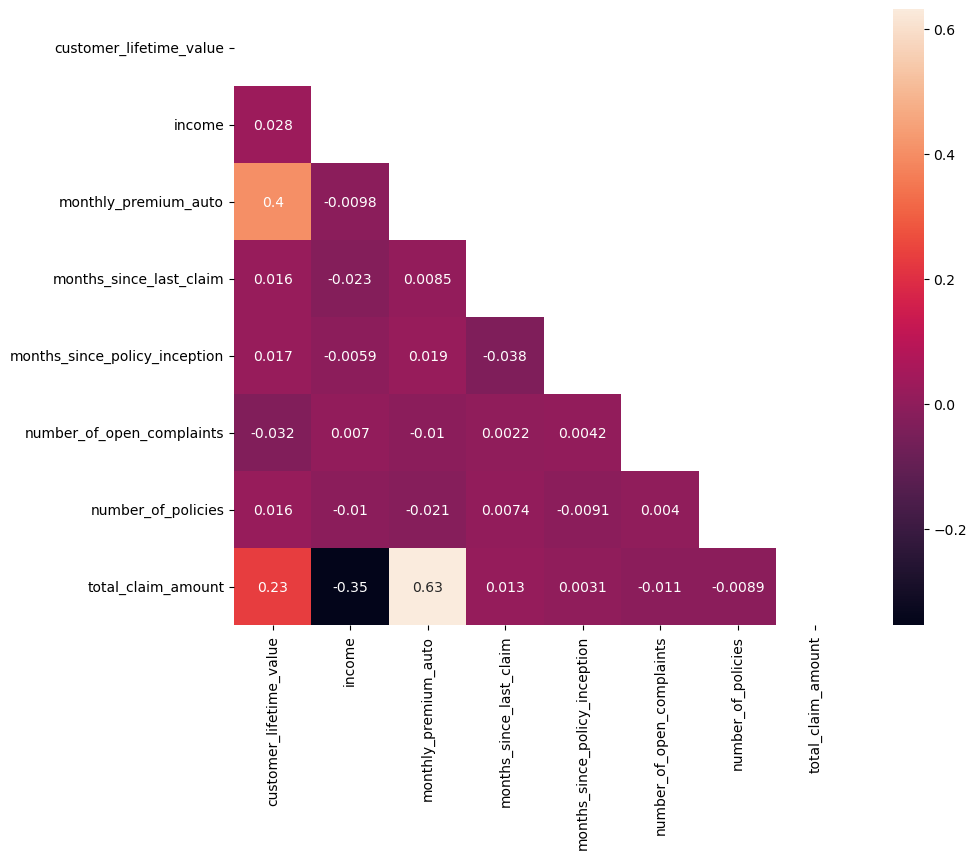

In [17]:
mask = np.zeros_like(correlation_matrix_after_drop)

mask[np.triu_indices_from(mask)] =True

fig, ax = plt.subplots(figsize=(10,8))
ax = sns.heatmap(correlation_matrix_after_drop, mask = mask, annot=True)
plt.show()

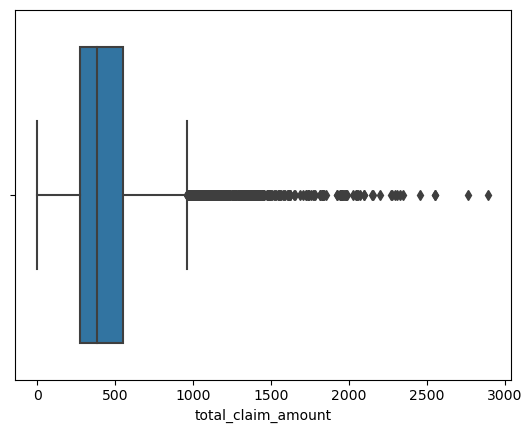

In [18]:
sns.boxplot(x= df['total_claim_amount'])
plt.show()

In [19]:
X = df.drop('total_claim_amount', axis=1)
y = df['total_claim_amount']

In [20]:
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

X = X.astype(int) 

X

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,month,state_California,state_Nevada,...,sales_channel_Branch,sales_channel_Call Center,sales_channel_Web,vehicle_class_Luxury Car,vehicle_class_Luxury SUV,vehicle_class_SUV,vehicle_class_Sports Car,vehicle_class_Two-Door Car,vehicle_size_Medsize,vehicle_size_Small
customer,,,,,,,,,,,,,,,,,,,,,
DK49336,4809,48029,61,7,52,0,9,2,0,0,...,0,0,0,0,0,0,0,0,1,0
KX64629,2228,0,64,3,26,0,1,1,1,0,...,0,1,0,0,0,0,0,0,1,0
LZ68649,14947,22139,100,34,31,0,2,2,0,0,...,0,1,0,0,0,1,0,0,1,0
XL78013,22332,49078,97,10,3,0,2,1,0,0,...,1,0,0,0,0,0,0,0,1,0
QA50777,9025,23675,117,15,31,0,7,1,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FE99816,15563,0,253,15,40,0,7,1,0,1,...,0,0,1,1,0,0,0,0,1,0
KX53892,5259,61146,65,7,68,0,6,1,0,0,...,1,0,0,0,0,0,0,0,1,0
TL39050,23893,39837,201,11,63,0,2,2,0,0,...,0,0,1,0,1,0,0,0,1,0


In [21]:
y

customer
DK49336     292.800000
KX64629     744.924331
LZ68649     480.000000
XL78013     484.013411
QA50777     707.925645
              ...     
FE99816    1214.400000
KX53892     273.018929
TL39050     381.306996
WA60547     618.288849
IV32877    1021.719397
Name: total_claim_amount, Length: 10910, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8728, 109)
X_test shape: (2182, 109)
y_train shape: (8728,)
y_test shape: (2182,)


In [24]:
len(X_train)/len(X)

0.8

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 18753.78086162479
Root Mean Squared Error (RMSE): 136.94444443505105
Mean Absolute Error (MAE): 95.95431915058604
R-squared (R2): 0.7677348291505343


In [26]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = X_train.select_dtypes(include=['number']).columns.tolist()

scaler = MinMaxScaler()

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])

X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [27]:
scaler

MinMaxScaler()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (8728, 109)
X_test shape: (2182, 109)
y_train shape: (8728,)
y_test shape: (2182,)


In [42]:
import numpy as np

# Select only numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns

# Loop through numerical columns
for col in numerical_cols:
    # Apply log transformation
    df[col] = np.log1p(df[col])

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

categorical_cols = X_train.select_dtypes(include=['object']).columns


X_train_encoded = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

regressor_improved = make_pipeline(StandardScaler(), LinearRegression())

param_grid = {
    'linearregression__fit_intercept': [True, False]
}

grid_improved = GridSearchCV(regressor_improved, param_grid, cv=5)
grid_improved.fit(X_train_encoded, y_train)

best_regressor_improved = grid_improved.best_estimator_

predictions_trainset_improved = best_regressor_improved.predict(X_train_encoded)

predictions_testset_improved = best_regressor_improved.predict(X_test_encoded)

rmse_improved = mean_squared_error(y_train, predictions_trainset_improved, squared=False)
mae_improved = mean_absolute_error(y_train, predictions_trainset_improved)
mse_improved = mean_squared_error(y_test, predictions_testset_improved)
r2_improved = r2_score(y_train, predictions_trainset_improved)

print("\nEnhanced Regression Metrics:")
print("===========================")
print("Improved Mean Squared Error (MSE):", mse_improved)
print("Improved R-squared (R2):", r2_improved)
print("Improved Mean Absolute Error (MAE):", mae_improved)
print("Improved Root Mean Squared Error (RMSE):", rmse_improved)


Enhanced Regression Metrics:
Improved Mean Squared Error (MSE): 18760.17504360389
Improved R-squared (R2): 0.7734161422425263
Improved Mean Absolute Error (MAE): 95.74349440780618
Improved Root Mean Squared Error (RMSE): 140.01128265668441
